In [1]:
import cv2
from matplotlib import pyplot as plt
from skimage.future import graph 
from skimage import data, segmentation, color

In [2]:
img = cv2.imread("../assets/imori.jpg", 1)

In [14]:
# Color separating
labels1 = segmentation.slic(img, compactness=30, n_segments=200)
out1 = color.label2rgb(labels1, img, kind="avg")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


In [15]:
g = graph.rag_mean_color(img, labels1, mode="similarity")
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind="avg")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  This is separate from the ipykernel package so we can avoid doing imports until


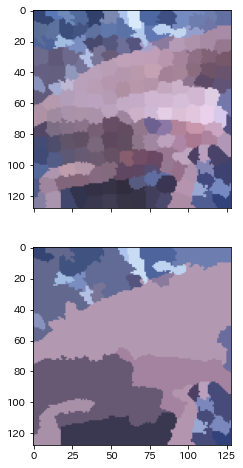

In [16]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6,8))

ax[0].imshow(out1[:,:,::-1])
ax[1].imshow(out2[:,:,::-1])